In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('/content/Supplement_Sales_Weekly_Expanded.csv')
df.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb


In [7]:
df["Date"] = pd.to_datetime(df["Date"])

In [8]:
df.isna().sum().sum()

np.int64(0)

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe()

,Date,Units Sold,Price,Revenue,Discount,Units Returned
count,4384,4384.000000,4384.000000,4384.000000,4384.000000,4384.000000
mean,2022-08-18 12:00:00,150.200274,34.781229,5226.569446,0.124398,1.531478
min,2020-01-06 00:00:00,103.000000,10.000000,1284.000000,0.000000,0.000000
25%,2021-04-26 00:00:00,142.000000,22.597500,3349.372500,0.060000,1.000000
50%,2022-08-18 12:00:00,150.000000,34.720000,5173.140000,0.120000,1.000000
75%,2023-12-11 00:00:00,158.000000,46.712500,7009.960000,0.190000,2.000000
max,2025-03-31 00:00:00,194.000000,59.970000,10761.850000,0.250000,8.000000
std,NaN,12.396099,14.198309,2192.491946,0.071792,1.258479


In [11]:
df.describe(include='object')

,Product Name,Category,Location,Platform
count,4384,4384,4384,4384
unique,16,10,3,3
top,Whey Protein,Vitamin,Canada,iHerb
freq,274,822,1507,1499


In [12]:
daily_sales = df.groupby("Date").agg({
    "Revenue": "sum",
    "Units Sold": "sum",
    "Units Returned": "sum"
}).reset_index()
daily_sales

,Date,Revenue,Units Sold,Units Returned
0,2020-01-06,71848.56,2406,19
1,2020-01-13,72416.18,2374,27
2,2020-01-20,76152.42,2370,26
3,2020-01-27,70306.73,2397,29
4,2020-02-03,98011.64,2384,34
...,...,...,...,...
269,2025-03-03,66065.44,2431,36
270,2025-03-10,92509.57,2411,30
271,2025-03-17,65590.53,2381,22
272,2025-03-24,69778.44,2416,27


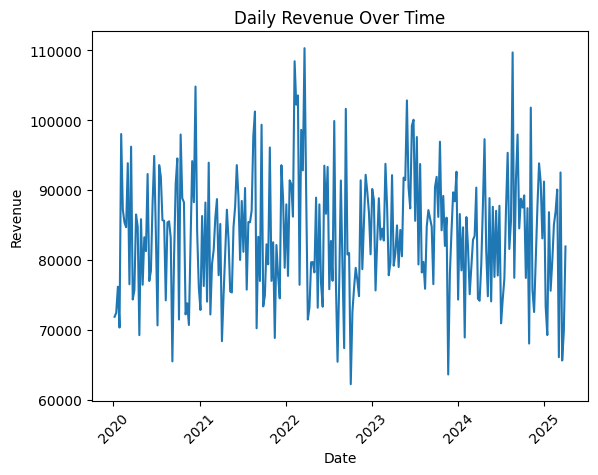

In [13]:
sns.lineplot(x="Date", y="Revenue", data=daily_sales)
plt.title("Daily Revenue Over Time")
plt.xticks(rotation=45)
plt.show()

In [14]:
category_revenue = df.groupby("Category")["Revenue"].sum().sort_values(ascending=False)

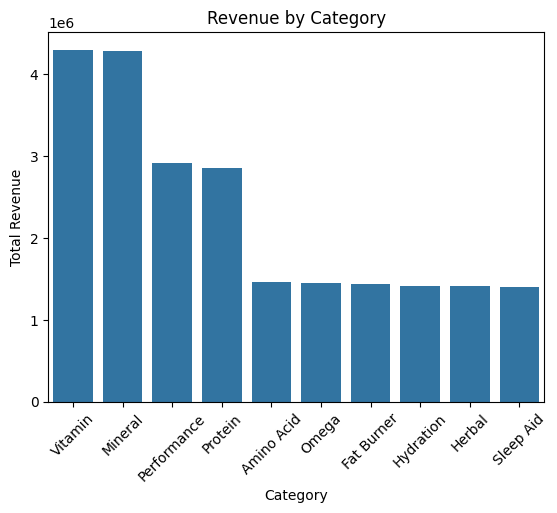

In [15]:
sns.barplot(x=category_revenue.index, y=category_revenue.values)
plt.title("Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

In [16]:
loc_platform = df.groupby(['Location', 'Platform'])["Revenue"].sum().unstack().fillna(0)

In [17]:
loc_platform

Platform,Amazon,Walmart,iHerb
Location,,,
Canada,2613844.28,2518639.07,2716096.38
UK,2442671.23,2637066.25,2624222.86
USA,2612936.27,2232862.30,2514941.81


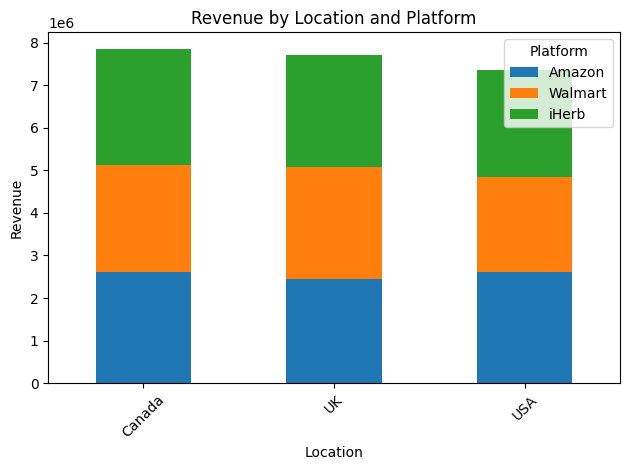

In [18]:
loc_platform.plot(kind='bar', stacked=True)
plt.title("Revenue by Location and Platform")
plt.xlabel("Location")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
top_products = df.groupby("Product Name")["Revenue"].sum().sort_values(ascending=False).head(10)
top_products

,Revenue
Product Name,
Biotin,1486798.62
Zinc,1482546.95
Pre-Workout,1477183.78
BCAA,1464819.63
Fish Oil,1451065.87
Green Tea Extract,1440900.05
Collagen Peptides,1433297.24
Creatine,1432518.40
Iron Supplement,1431582.41


Text(0, 0.5, 'Total Revenue')

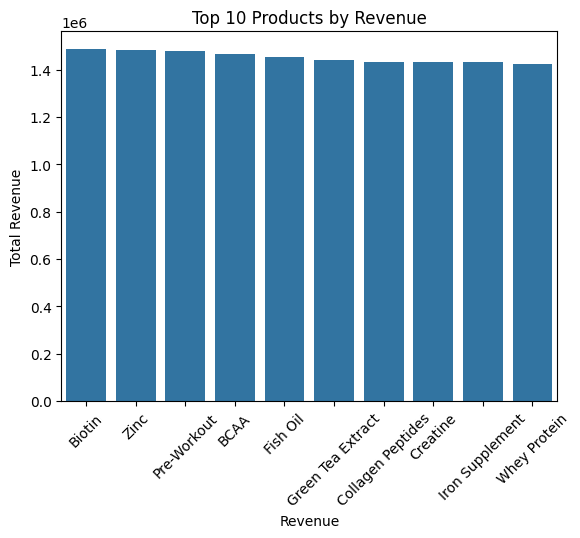

In [20]:
sns.barplot(x=top_products.index, y=top_products.values)
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.xticks(rotation=45)
plt.ylabel("Total Revenue")

In [21]:
df["Return Rate"] = df["Units Returned"] / df["Units Sold"]
df.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform,Return Rate
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart,0.013986
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon,0.000000
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon,0.000000
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart,0.000000
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb,0.019108


In [22]:
category_return = df.groupby("Category")["Return Rate"].mean().sort_values(ascending=False)
category_return

,Return Rate
Category,
Hydration,0.010746
Vitamin,0.010475
Amino Acid,0.010355
Fat Burner,0.010229
Performance,0.010207
Protein,0.010203
Mineral,0.010079
Omega,0.009870
Sleep Aid,0.009860


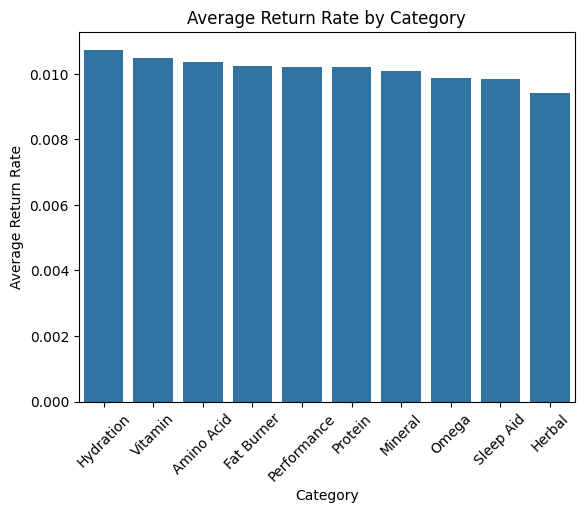

In [23]:
sns.barplot(x=category_return.index, y=category_return.values)
plt.title("Average Return Rate by Category")
plt.xlabel("Category")
plt.ylabel("Average Return Rate")
plt.xticks(rotation=45)
plt.show()

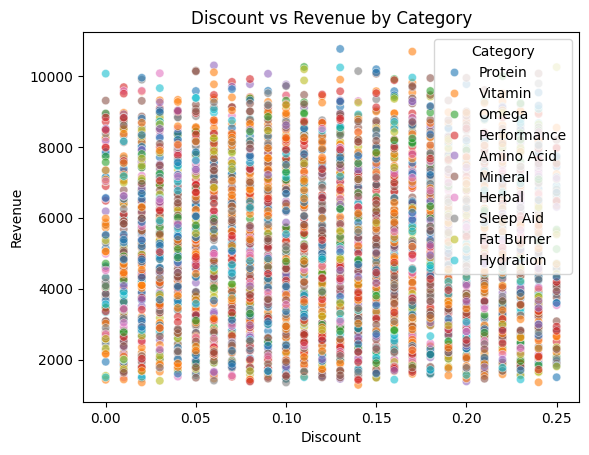

In [24]:
sns.scatterplot(data=df, x="Discount", y="Revenue", hue="Category", alpha=0.6)
plt.title("Discount vs Revenue by Category")
plt.xlabel("Discount")
plt.ylabel("Revenue")
plt.show()

In [25]:
corr = df[["Units Sold", "Price", "Revenue", "Discount", "Units Returned"]].corr()
corr

,Units Sold,Price,Revenue,Discount,Units Returned
Units Sold,1.000000,0.013749,0.210462,-0.010435,0.116523
Price,0.013749,1.000000,0.977198,-0.008668,-0.010410
Revenue,0.210462,0.977198,1.000000,-0.012531,0.012432
Discount,-0.010435,-0.008668,-0.012531,1.000000,0.004276
Units Returned,0.116523,-0.010410,0.012432,0.004276,1.000000


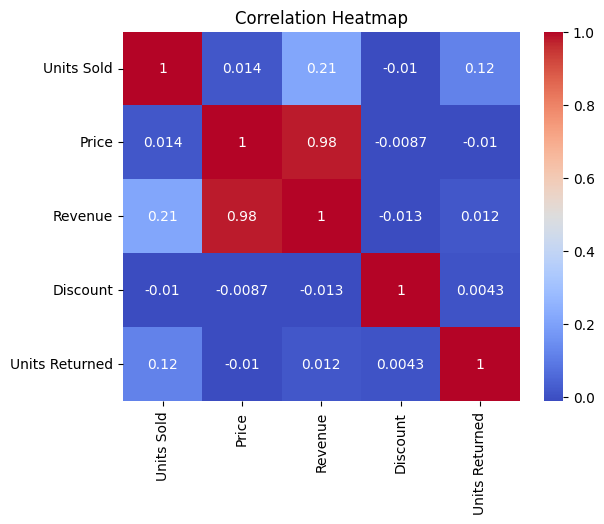

In [26]:
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [28]:
fig = px.line(df, x='Date', y='Revenue', color='Category', title='Revenue Over Time by Category')
fig.show()

In [32]:
df['Monthly'] = df['Date'].dt.to_period('M')
monthly = df.groupby('Monthly').agg({
    'Revenue': 'sum',
    'Units Sold': 'sum',
    'Discount': 'mean',
    'Units Returned': 'sum'
}).reset_index()
monthly


,Monthly,Revenue,Units Sold,Discount,Units Returned
0,2020-01,290723.89,9547,0.120313,101
1,2020-02,355213.26,9493,0.128125,91
2,2020-03,416547.17,12145,0.111375,123
3,2020-04,326287.92,9605,0.138281,91
4,2020-05,333210.99,9557,0.119375,90
...,...,...,...,...,...
58,2024-11,329894.33,9838,0.117813,106
59,2024-12,446728.99,12042,0.127125,99
60,2025-01,304965.15,9617,0.125156,92
61,2025-02,341768.25,9542,0.128125,103


In [33]:
monthly['Monthly'] = monthly['Monthly'].astype(str)

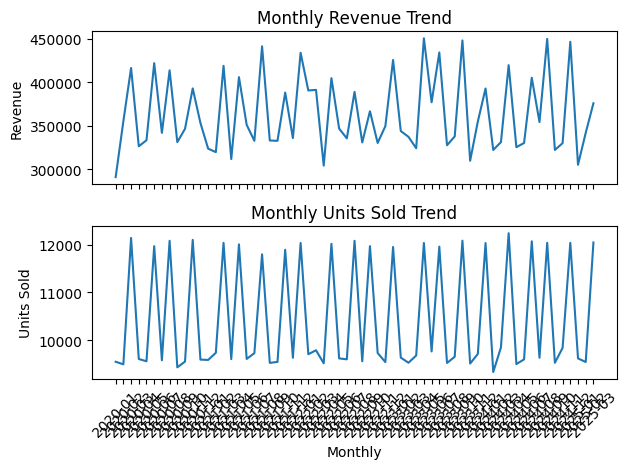

In [36]:
fig, axes = plt.subplots(2,1, sharex=True)
sns.lineplot(data=monthly, x='Monthly', y='Revenue', ax=axes[0])
axes[0].set_title('Monthly Revenue Trend')
axes[0].tick_params(axis='x', rotation=45)

sns.lineplot(data=monthly, x='Monthly', y='Units Sold', ax=axes[1])
axes[1].set_title('Monthly Units Sold Trend')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [37]:
df['Net Revenue'] = df['Revenue'] - (df['Units Returned'] * df['Price'])

In [39]:
category_profit = df.groupby('Category')['Net Revenue'].sum().sort_values(ascending=False)
category_profit

,Net Revenue
Category,
Vitamin,4255337.22
Mineral,4233108.50
Performance,2879997.43
Protein,2827040.48
Amino Acid,1449514.18
Omega,1436916.36
Fat Burner,1426130.43
Hydration,1396778.95
Herbal,1392349.37


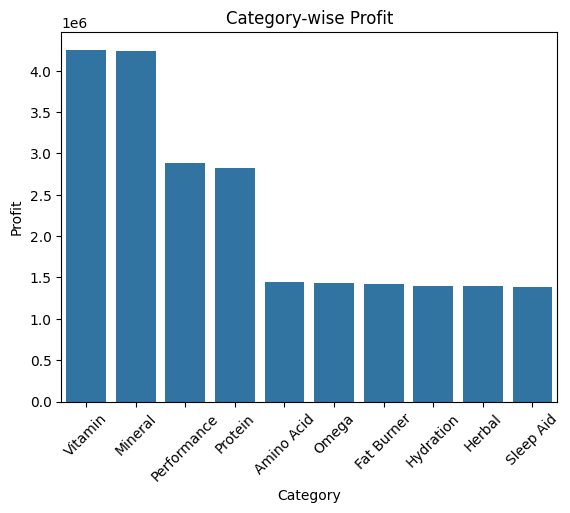

In [41]:
sns.barplot(x=category_profit.index, y=category_profit.values)
plt.title('Category-wise Profit')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()